# Project Description

Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.  

Some relevant columns in the dataset:


•	Date - The date of the observation  
•	AveragePrice - the average price of a single avocado  
•	type - conventional or organic  
•	year - the year  
•	Region - the city or region of the observation  
•	Total Volume - Total number of avocados sold  
•	4046 - Total number of avocados with PLU 4046 sold  
•	4225 - Total number of avocados with PLU 4225 sold  
•	4770 - Total number of avocados with PLU 4770 sold  

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')

## Understanding the Data

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [6]:
df.isnull().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [7]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64
conventional    9126
organic         9123
Name: type, dtype: int64
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                  

## Preparation of the Data

In [8]:
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.00,organic,2018,WestTexNewMexico


## Understanding Features

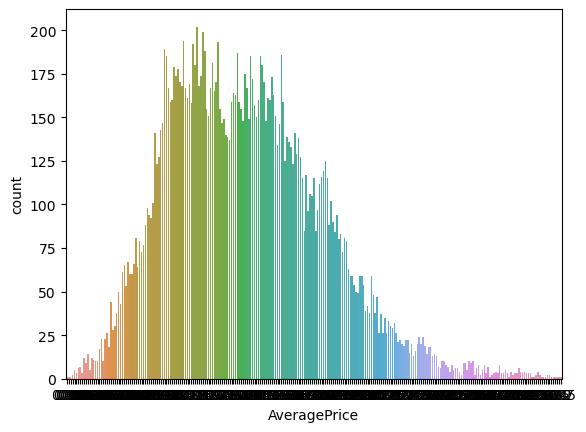

In [10]:
sns.countplot(x='AveragePrice', data=df);

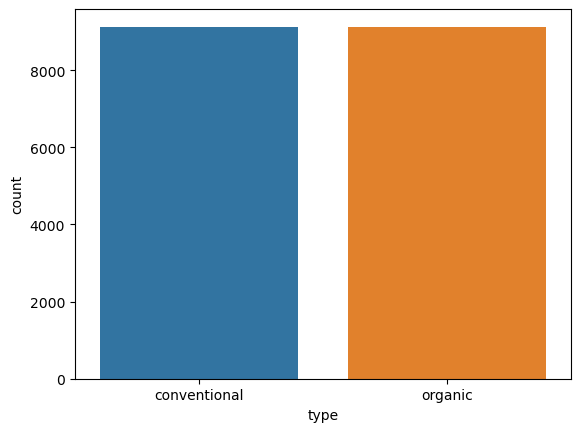

In [11]:
sns.countplot(x='type', data=df);

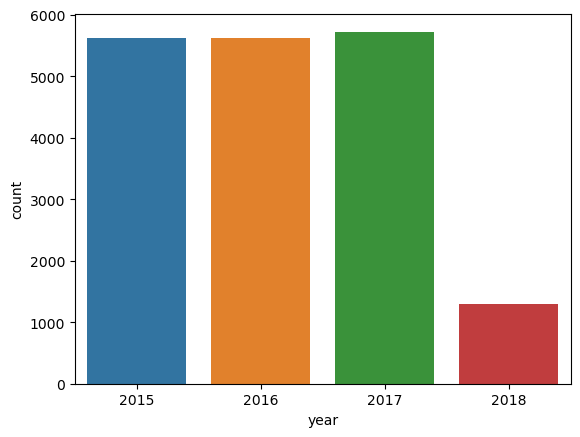

In [12]:
sns.countplot(x='year', data=df);

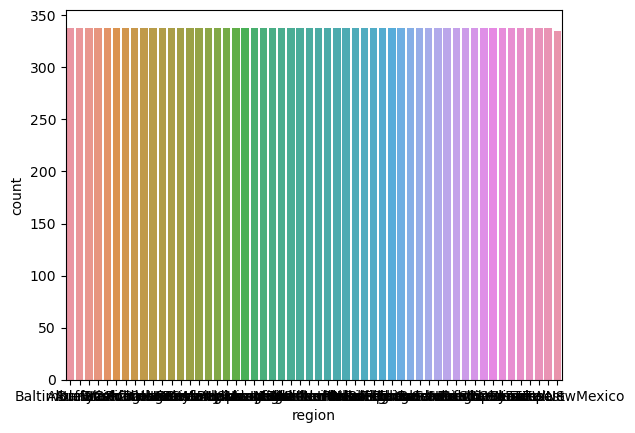

In [13]:
sns.countplot(x='region', data=df);

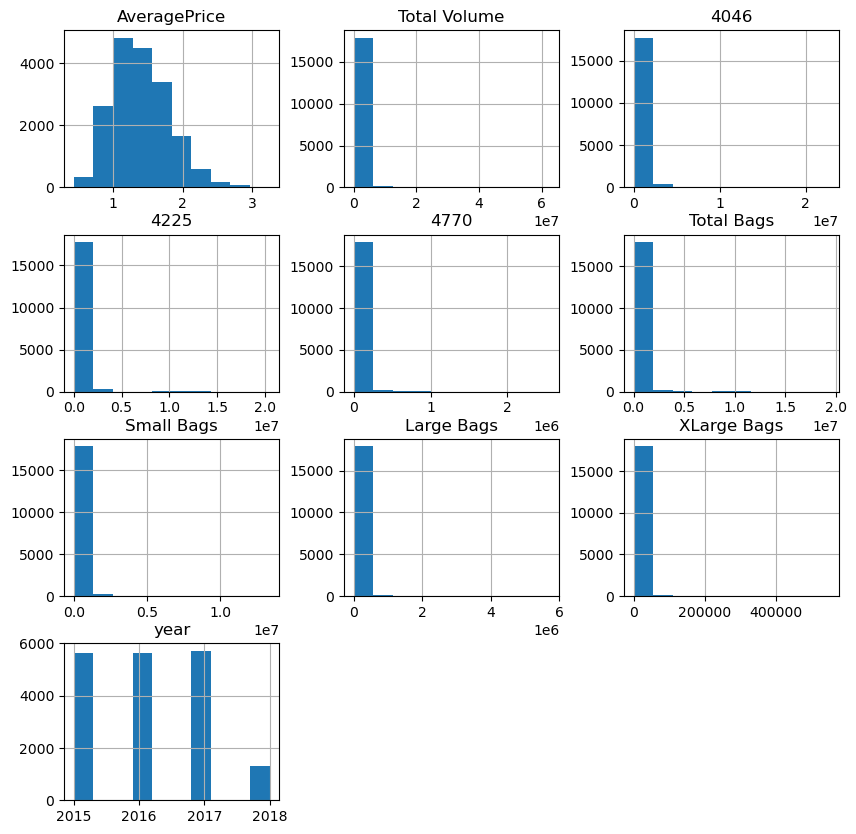

In [14]:
df.hist(bins=10,figsize=(10,10));

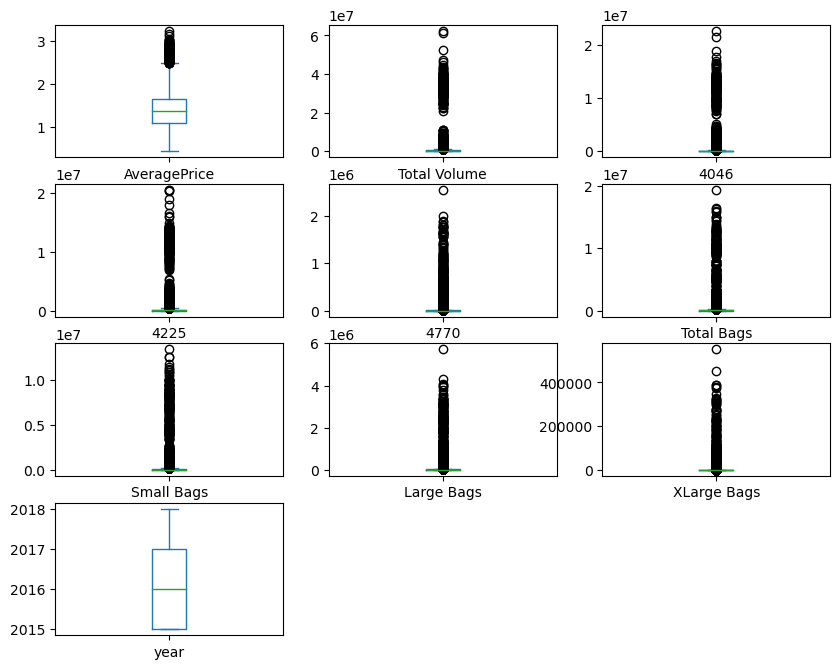

In [15]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,10));

## Understanding Feature Relationships

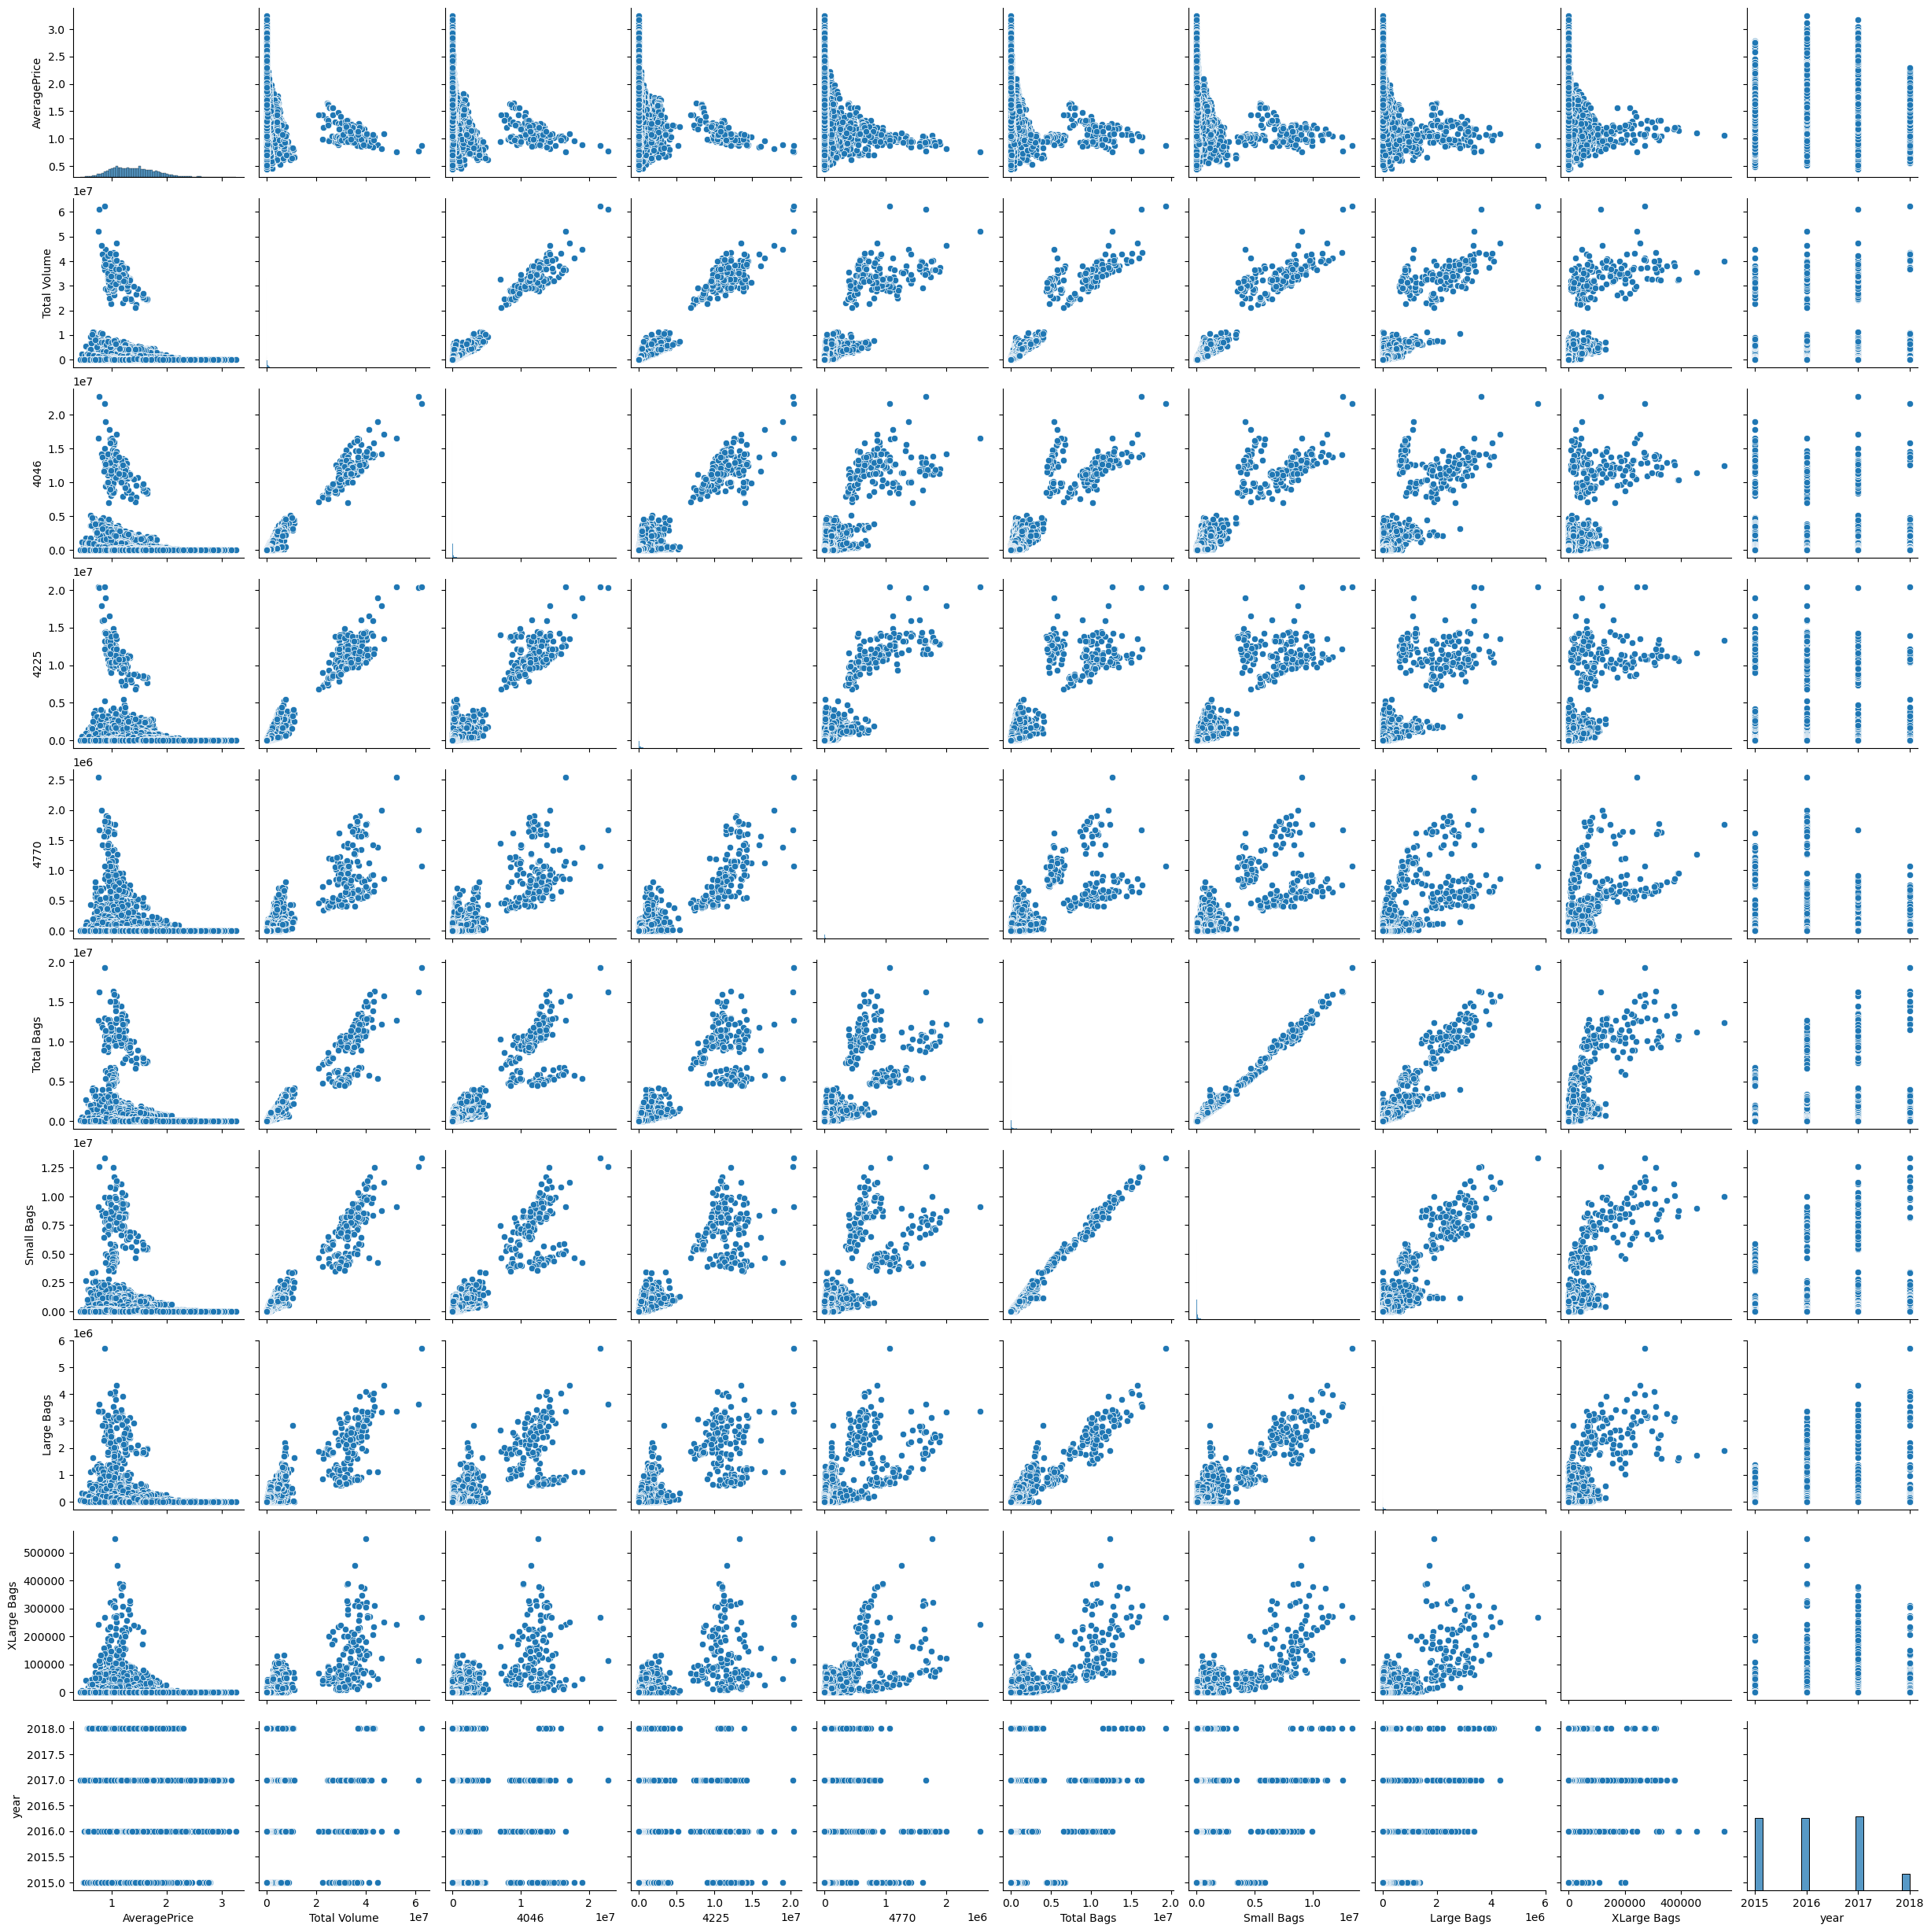

In [16]:
sns.pairplot(df, palette="Dark2");#, hue='AveragePrice');

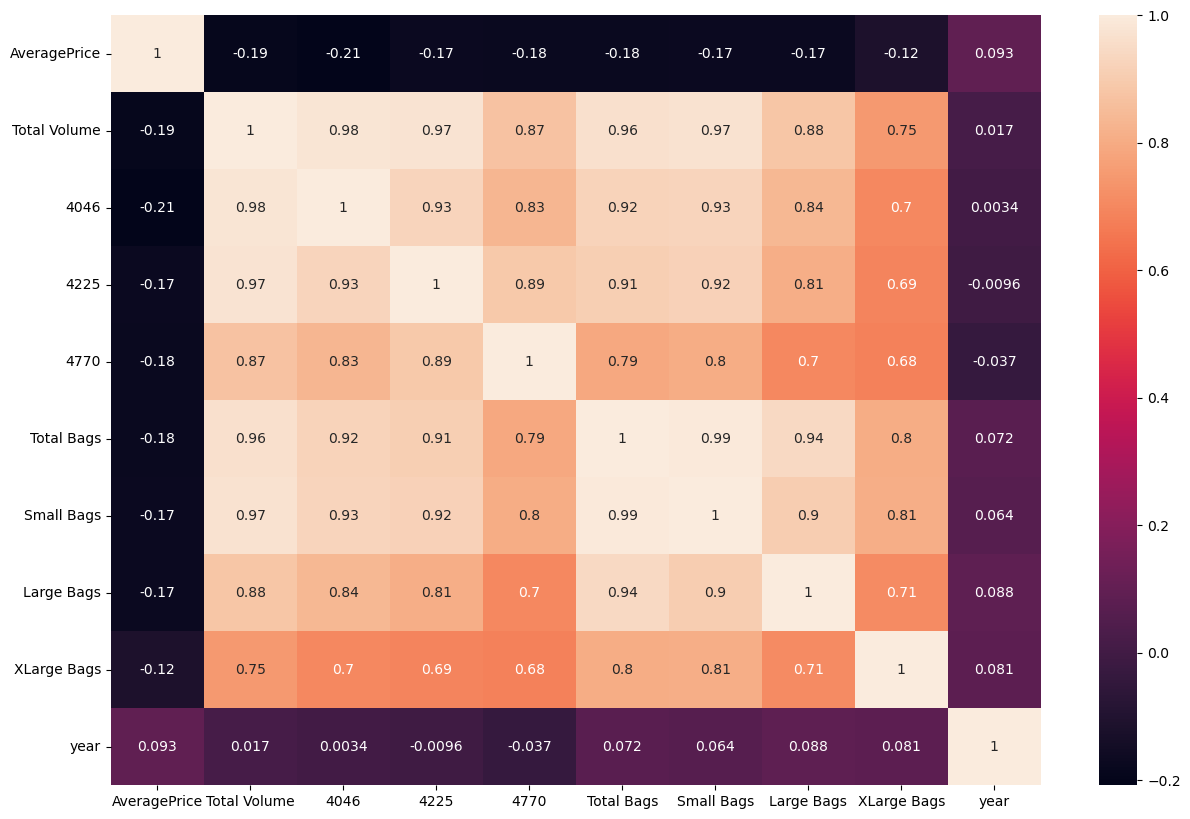

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [18]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.00,2015,0.00
1,50.00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.00,2015,0.00
2,49.00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.00,2015,0.00
3,48.00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.00,2015,0.00
4,47.00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.00,2015,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.00,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,1.00,2018,53.00
18245,160.00,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,1.00,2018,53.00
18246,159.00,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,1.00,2018,53.00
18247,158.00,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,1.00,2018,53.00


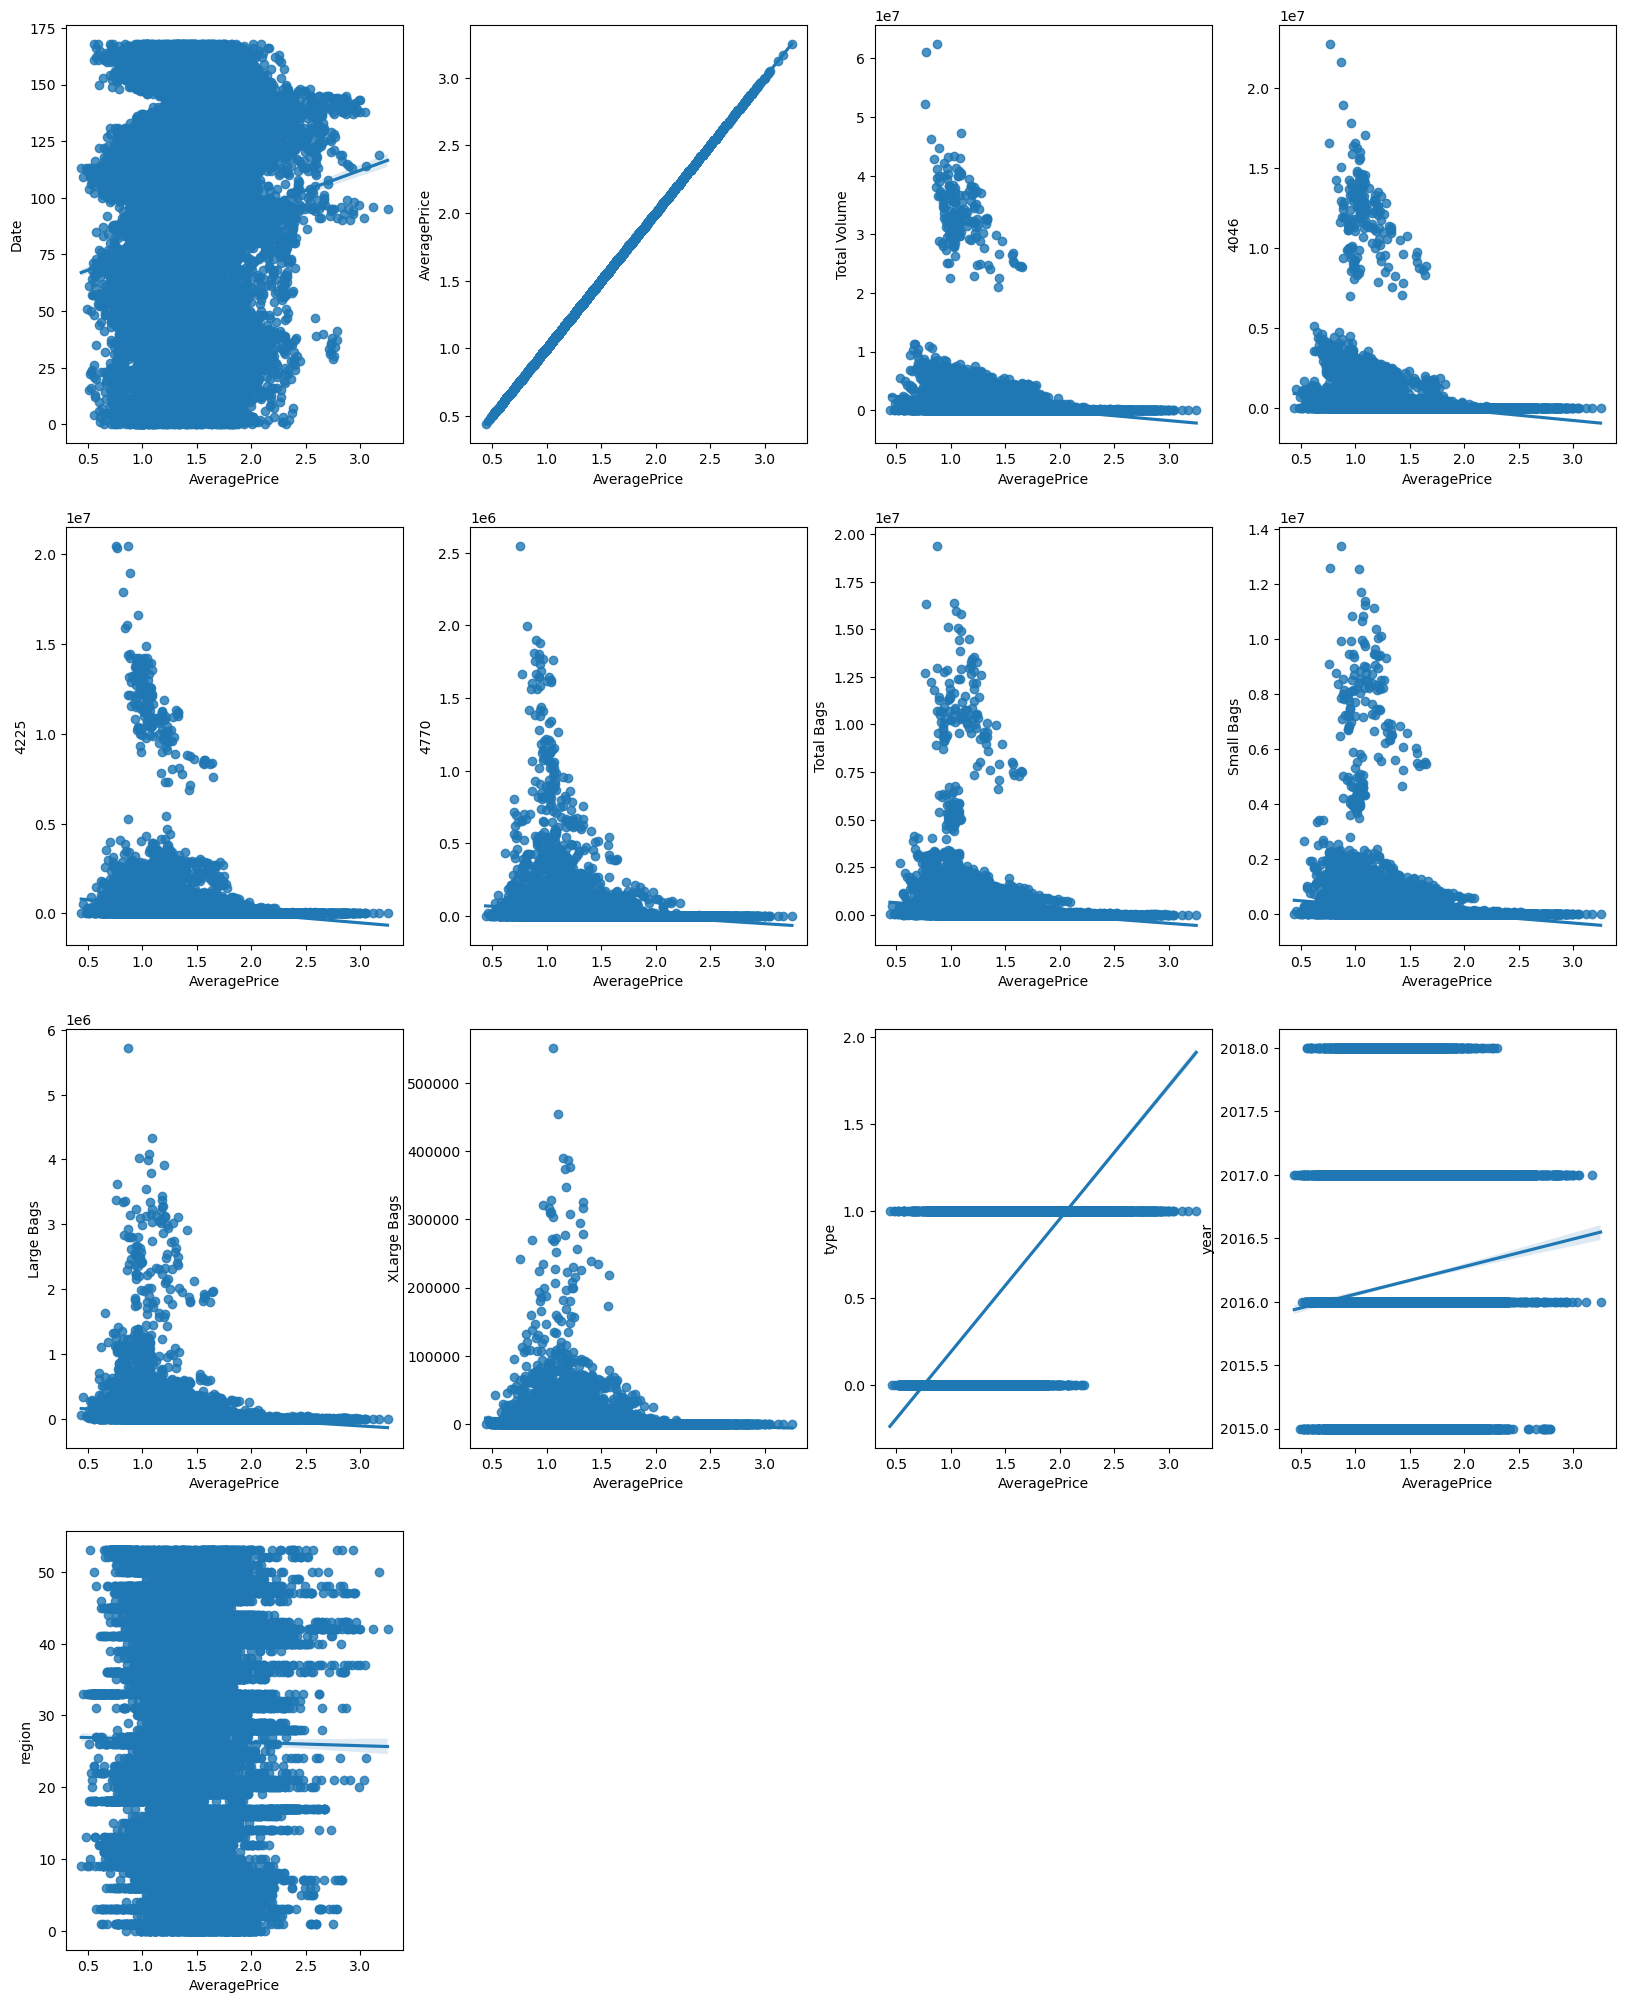

In [19]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=14:
        plt.subplot(4,4,p)
        sns.regplot(x='AveragePrice', y=i, data=df)
        plt.xlabel('AveragePrice')
        plt.ylabel(i)
    p+=1
plt.show()

## Model Preparation - AveragePrice

In [20]:
# Removing Outliers

from scipy.stats import zscore

z= np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

print(df1.shape)
print(df.shape)

(17651, 13)
(18249, 13)


In [21]:
# Data Loss Percentage

(18249-17319)/18249*100

5.096169653131678

In [22]:
#df=df1

In [23]:
# Checking Skewness

df_skew = df.skew()
df_skew

Date            0.00
AveragePrice    0.58
Total Volume    9.01
4046            8.65
4225            8.94
4770           10.16
Total Bags      9.76
Small Bags      9.54
Large Bags      9.80
XLarge Bags    13.14
type            0.00
year            0.22
region          0.00
dtype: float64

In [24]:
# Removing Skewness Using Cuberoot

for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])
df.skew()

Date           0.00
AveragePrice   0.07
Total Volume   2.24
4046           2.28
4225           2.13
4770           2.32
Total Bags     2.30
Small Bags     2.22
Large Bags     2.19
XLarge Bags    2.84
type           0.00
year           0.22
region         0.00
dtype: float64

In [25]:
# Assigning Feature & Target Data

x = df.drop(['AveragePrice'], axis=1)
y = df[['AveragePrice']]

In [26]:
x = df.drop(['AveragePrice'], axis=1)
y = df[['AveragePrice']]

In [27]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [28]:
# Checking Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,10.59,Date
1,314.35,Total Volume
2,36.80,4046
3,59.08,4225
4,4.65,4770
5,183.73,Total Bags
6,97.33,Small Bags
7,12.86,Large Bags
8,2.71,XLarge Bags
9,1.83,type


In [29]:
x = x.drop(['Total Volume', 'Total Bags', 'year'], axis=1)

In [30]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.34,Date
1,6.05,4046
2,7.87,4225
3,4.60,4770
4,9.92,Small Bags
5,2.91,Large Bags
6,2.64,XLarge Bags
7,1.78,type
8,1.13,region


In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation - AveragePrice

In [42]:
#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
#reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
#print(reg_models)

## Model Evaluation - AveragePrice

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor()

In [58]:
rf_clf.fit(xtrain,ytrain)

RandomForestRegressor()

In [67]:
from sklearn.metrics import r2_score

rd_pred= rf_clf.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  90.44443241286477


## Model Preparation - Region

In [47]:
xr = df.drop(['region'], axis=1)
yr = df[['region']]

In [48]:
xr = xr.drop(['Total Volume', 'Total Bags', 'year'], axis=1)

In [49]:
scaler = preprocessing.StandardScaler()
xr = pd.DataFrame(scaler.fit_transform(xr), columns = xr.columns)

In [50]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(xr.values,i)
                        for i in range(len(xr.columns))]
vif["Features"] = xr.columns

vif

,VIF values,Features
0,1.40,Date
1,1.97,AveragePrice
2,5.92,4046
3,8.25,4225
4,4.58,4770
5,9.94,Small Bags
6,3.04,Large Bags
7,2.65,XLarge Bags
8,2.37,type


In [51]:
xrtrain,xrtest,yrtrain,yrtest = train_test_split(xr,yr,test_size = .25, random_state = 39)

## Model Creation - Region

In [52]:
clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(xrtrain, xrtest, yrtrain, yrtest)
print(models);

 97%|█████████▋| 28/29 [03:44<00:19, 19.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1934
[LightGBM] [Info] Number of data points in the train set: 13686, number of used features: 9
[LightGBM] [Info] Start training from score -3.959608
[LightGBM] [Info] Start training from score -4.014740
[LightGBM] [Info] Start training from score -3.959608
[LightGBM] [Info] Start training from score -3.971169
[LightGBM] [Info] Start training from score -3.959608
[LightGBM] [Info] Start training from score -4.002668
[LightGBM] [Info] Start training from score -3.994700
[LightGBM] [Info] Start training from score -4.006676
[LightGBM] [Info] Start training from score -4.035191
[LightGBM] [Info] Start training from score -4.010700
[LightGBM] [Info] Start training from score -3.998676
[LightGBM] [Info] Start training from score -3.982865
[LightGBM] [Info] Start training from score -3.963447
[LightG

100%|██████████| 29/29 [04:02<00:00,  8.35s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.93               0.93    None      0.93   
RandomForestClassifier             0.91               0.91    None      0.91   
LGBMClassifier                     0.89               0.90    None      0.90   
XGBClassifier                      0.89               0.89    None      0.89   
BaggingClassifier                  0.86               0.86    None      0.86   
LabelPropagation                   0.82               0.82    None      0.82   
LabelSpreading                     0.81               0.82    None      0.81   
KNeighborsClassifier               0.81               0.81    None      0.81   
DecisionTreeClassifier             0.80               0.80    None      0.80   
QuadraticDiscriminantAnalysis      0.74               0.74    None      0.74   
ExtraTreeClassifier                0.71 

## Model Evaluation - Region

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()

In [71]:
et_clf.fit(xrtrain,yrtrain)

ExtraTreesClassifier()

In [84]:
grid_param = {'n_estimators': [10,50,100],
              'criterion': ['log_loss', 'gini', 'entropy'],
              'max_depth': [2,8,16,32,50],
              'max_features': ['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'warm_start': [True, False],}

In [85]:
grid_search = GridSearchCV(estimator=et_clf, param_grid=grid_param, cv=2, verbose=3)

In [86]:
grid_search.fit(xrtrain,yrtrain)

Fitting 2 folds for each of 540 candidates, totalling 1080 fits
[CV 1/2] END bootstrap=True, criterion=log_loss, max_depth=2, max_features=auto, n_estimators=10, warm_start=True;, score=nan total time=   0.0s
[CV 2/2] END bootstrap=True, criterion=log_loss, max_depth=2, max_features=auto, n_estimators=10, warm_start=True;, score=nan total time=   0.0s
[CV 1/2] END bootstrap=True, criterion=log_loss, max_depth=2, max_features=auto, n_estimators=10, warm_start=False;, score=nan total time=   0.0s
[CV 2/2] END bootstrap=True, criterion=log_loss, max_depth=2, max_features=auto, n_estimators=10, warm_start=False;, score=nan total time=   0.0s
[CV 1/2] END bootstrap=True, criterion=log_loss, max_depth=2, max_features=auto, n_estimators=50, warm_start=True;, score=nan total time=   0.0s
[CV 2/2] END bootstrap=True, criterion=log_loss, max_depth=2, max_features=auto, n_estimators=50, warm_start=True;, score=nan total time=   0.0s
[CV 1/2] END bootstrap=True, criterion=log_loss, max_depth=2, ma

GridSearchCV(cv=2, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [2, 8, 16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100],
                         'warm_start': [True, False]},
             verbose=3)

In [87]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 32,
 'max_features': 'log2',
 'n_estimators': 100,
 'warm_start': False}

In [92]:
Final_clf = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=32, max_features='log2', n_estimators=100, warm_start=False)

In [93]:
from sklearn.metrics import accuracy_score

Final_clf.fit(xrtrain,yrtrain)
pred = Final_clf.predict(xrtest)
acc = accuracy_score(yrtest,pred)
print(acc*100)

93.22813938198553
